average accuracy of decision tree (CART): 0.8989
average accuracy of decision tree (C4.5): 0.9342


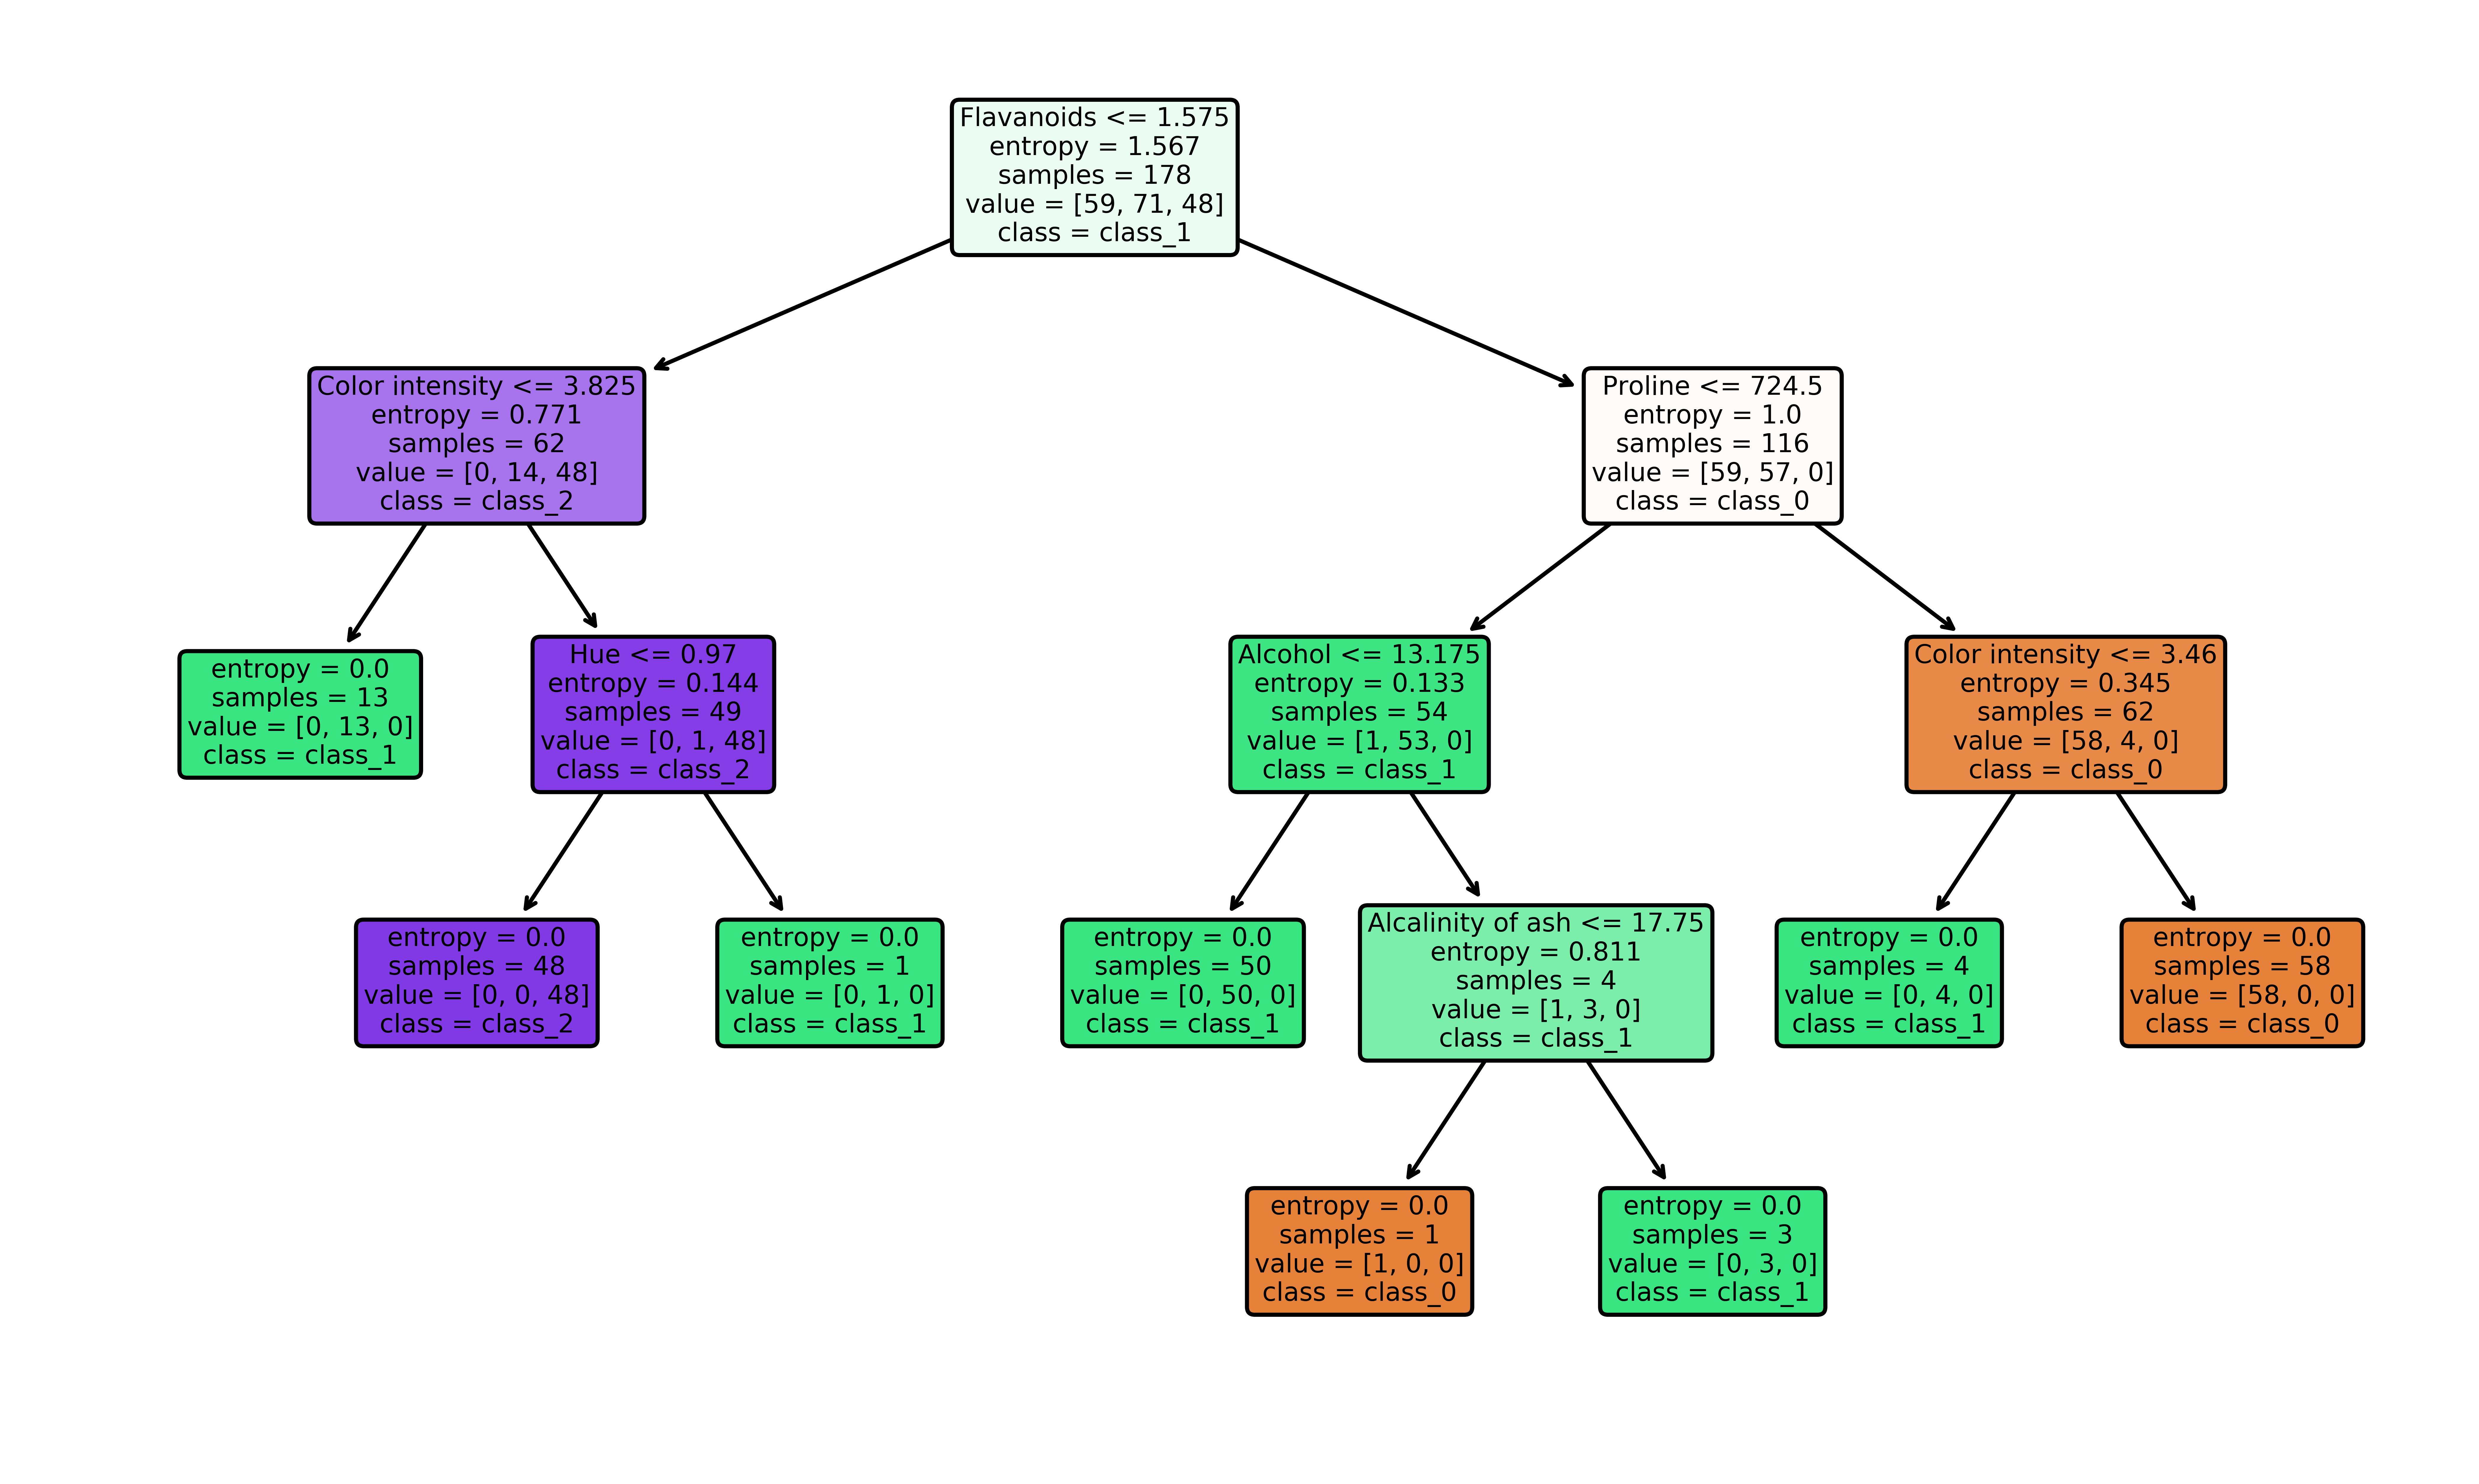

In [36]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, tree, model_selection, metrics

from sklearn.datasets import load_wine
data = load_wine()
X = data.data
Y = data.target
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


def tree_draw(tree_type='CART', criterion='gini', figsize=(10,6)):
    dtree = tree.DecisionTreeClassifier(criterion=criterion)
    dtree.fit(X, Y)

    fn=['Alcohol','Malic acid','Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
    cn=['class_0', 'class_1', 'class_2']
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = figsize, dpi=1000)
    tree.plot_tree(dtree, feature_names = fn, class_names=cn, filled = True, rounded = True);
    fig.savefig('tree_' + str(tree_type) + '.jpg')

    
def tree_train(criterion='gini'):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df[data.feature_names], df['target'], test_size = 0.1)
    dtree = tree.DecisionTreeClassifier(criterion=criterion)
    dtree.fit(X_train, Y_train)
    Y_pred = dtree.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    return accuracy


for tree_type, criterion, figsize in [('CART', 'gini', (18,6)), ('C4.5', 'entropy', (10,6))]:
    accuracy_list = []

    for i in range(0, 1000):
        ac = tree_train(criterion=criterion)
        accuracy_list.append(ac)
    
    tree_draw(tree_type=tree_type, criterion=criterion, figsize=figsize)
    
    print('average accuracy of decision tree ' + '(' + str(tree_type) + '): ' + str("%.4f" % np.mean(accuracy_list)))
    